In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pickle
import networkx as nx
import random
from collections import Counter

## Figure 4 & Figure 6 - Synthetic datasets

In [21]:
experiments=["synthetic_small", "synthetic_base", "synthetic_big"]
out_dir="../synthetic_output"
iteration_from=0
iteration_to=10
verbose=0
informative_feature_numbers = [1,2,5,10,14,20,50,100,127,200,500,600,1000,2000,3072,5000,6000,10000]
classes = [2,100]

In [27]:
correlation = np.zeros([len(experiments), iteration_to-iteration_from,len(classes),len(informative_feature_numbers)])
for experiment_number, experiment in enumerate(experiments):
    for number_iteration in range(iteration_from,iteration_to):  
        for ind_class, number_classes in enumerate(classes):
            for ind_feat, n_informative_features in enumerate(informative_feature_numbers):
                if(n_informative_features < 20):
                    if(2** n_informative_features  < 2*number_classes): continue; #This is required so we can generate the dataset
                correlation[experiment_number, number_iteration,ind_class,ind_feat] = pickle.load(
                         open('{}/{}/correlation_{}_{}_{}.p'.format(out_dir, experiment,
                                                                                number_iteration, number_classes,
                                                                                n_informative_features),'rb'))

In [28]:
mean_correlation  = correlation.mean(axis=1)
mean_correlation[mean_correlation==0] = np.nan

### Figure 4 

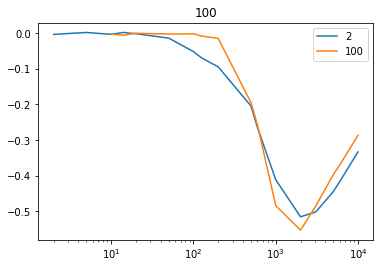

In [35]:
for i,classs in enumerate(classes):
    plt.plot(informative_feature_numbers,mean_correlation[1].T[:,i],label=classs)
plt.xscale("log")
plt.legend();
plt.title(classs);

### Figure 6 

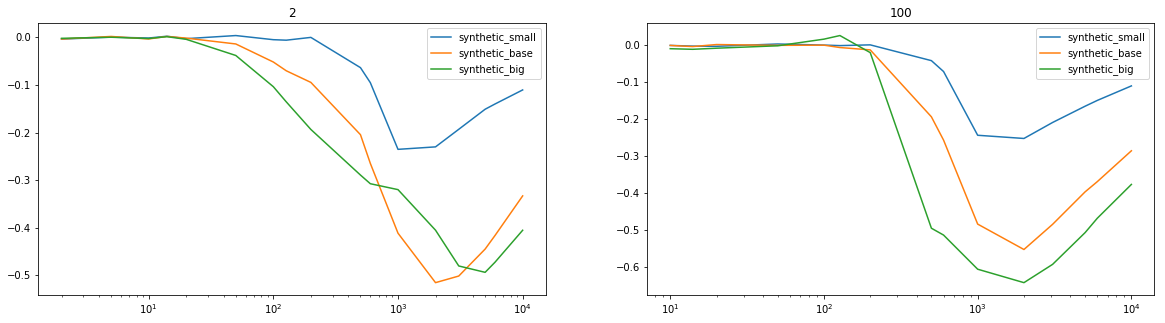

In [29]:
fig, axs = plt.subplots(1,len(classes),figsize=(20,5))
for experiment_number, experiment in enumerate(experiments):   
    for i,classs in enumerate(classes):
        axs[i].plot(informative_feature_numbers,mean_correlation[experiment_number].T[:,i],label=experiment)
        axs[i].set_xscale("log")
        axs[i].legend();
        axs[i].set_title(classs)

## Figure 5

In [140]:
 X,y = make_classification(n_samples=1000,n_features=200,n_informative=3,n_redundant=0,n_repeated=0,n_classes=2,n_clusters_per_class=1,random_state=15,shuffle=False)

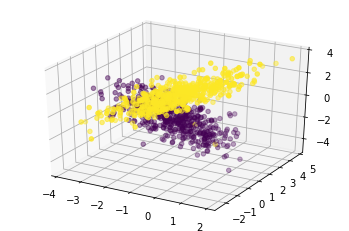

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y);